In [ ]:
# https://www.tensorflow.org/guide/data

import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)

flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)
flowers_root = pathlib.Path(flowers_root)

for item in flowers_root.glob("*"):
  print(item.name)


list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))
for f in list_ds.take(5):
  print(f.numpy())

def process_path(file_path):
  label = tf.strings.split(file_path, os.sep)[-2]
  return tf.io.read_file(file_path), label

labeled_ds = list_ds.map(process_path)

for image_raw, label_text in labeled_ds.take(1):
  print(repr(image_raw.numpy()[:100]))
  print()
  print(label_text.numpy())

sunflowers
LICENSE.txt
dandelion
daisy
tulips
roses
b'/home/tmeng12/.keras/datasets/flower_photos/tulips/176458518_f81d4bff8e.jpg'
b'/home/tmeng12/.keras/datasets/flower_photos/roses/17051448596_69348f7fce_m.jpg'
b'/home/tmeng12/.keras/datasets/flower_photos/tulips/14116780333_7836f4448c.jpg'
b'/home/tmeng12/.keras/datasets/flower_photos/roses/19988406792_68201f76e3_n.jpg'
b'/home/tmeng12/.keras/datasets/flower_photos/daisy/4613992315_143ccc2a10_m.jpg'
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05'

b'tulips'


In [10]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=20)
images, labels = next(img_gen.flow_from_directory(flowers_root))
print(images.dtype, images.shape)
print(labels.dtype, labels.shape)
ds = tf.data.Dataset.from_generator(
    lambda: img_gen.flow_from_directory(flowers),
    output_types=(tf.float32, tf.float32),
    output_shapes=([32,256,256,3], [32,5])
)

ds.element_spec

Found 3670 images belonging to 5 classes.
float32 (32, 256, 256, 3)
float32 (32, 5)


(TensorSpec(shape=(32, 256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(32, 5), dtype=tf.float32, name=None))

In [11]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))
print(list_ds)
print(iter(list_ds))

file_path = next(iter(list_ds))
print(file_path)

<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
tf.Tensor(b'/home/tmeng12/.keras/datasets/flower_photos/daisy/14372713423_61e2daae88.jpg', shape=(), dtype=string)


In [12]:
# Reads an image from a file, decodes it into a dense tensor, and resizes it
# to a fixed shape.
def parse_image(filename):
  parts = tf.strings.split(filename, os.sep)
  label = parts[-2]

  image = tf.io.read_file(filename)
  image = tf.io.decode_jpeg(image)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [128, 128])
  return image, label

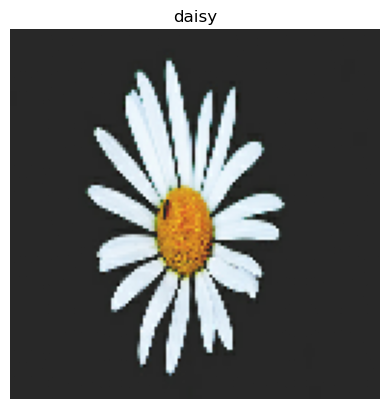

In [23]:
file_path = next(iter(list_ds))
image, label = parse_image(file_path)

def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(label.numpy().decode('utf-8'))
  plt.axis('off')

show(image, label)

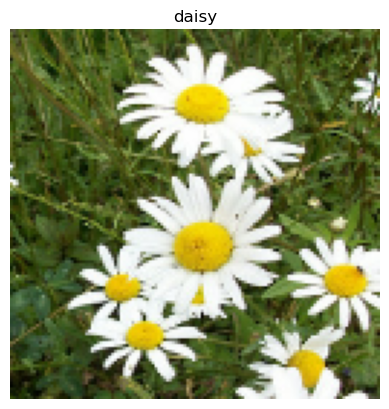

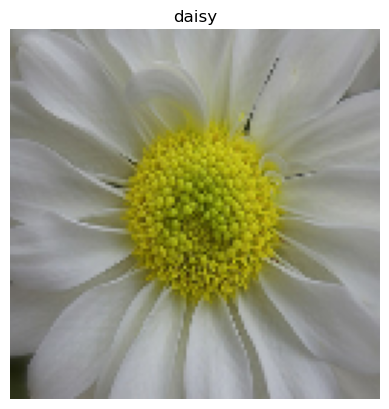

In [24]:
images_ds = list_ds.map(parse_image)

for image, label in images_ds.take(2):
  show(image, label)